In [33]:
import pandas as pd

In [34]:
from quoptuna import DataPreparation, Optimizer

In [35]:
db_name = "corral"
study_name = "corral"
optimizer = Optimizer(db_name=db_name, study_name=study_name)

In [36]:
optimizer.storage_location

'sqlite:///db/corral.db'

In [37]:
optimizer.load_study()
study = optimizer.study

In [38]:
best_trial = study.best_trials

In [39]:
def format_trial(trial):
    quantum_f1_score = trial.user_attrs.get("Quantum_f1_score")
    classical_f1_score = trial.user_attrs.get("Classical_f1_score")
    f1_score = (
        quantum_f1_score
        if quantum_f1_score != 0
        else classical_f1_score
        if classical_f1_score != 0
        else "N/A"
    )
    return f"Trial {trial.number} {trial.params.get('model_type')} F1-Score {f1_score}"

In [40]:
for trial in best_trial:
    print(format_trial(trial))

Trial 8 QuantumKitchenSinks F1-Score 1.0
Trial 10 QuantumKitchenSinks F1-Score 1.0
Trial 11 QuantumKitchenSinks F1-Score 1.0
Trial 12 DressedQuantumCircuitClassifierSeparable F1-Score 1.0
Trial 16 QuantumKitchenSinks F1-Score 1.0
Trial 17 DressedQuantumCircuitClassifier F1-Score 1.0
Trial 20 QuantumKitchenSinks F1-Score 1.0
Trial 21 QuantumKitchenSinks F1-Score 1.0
Trial 23 QuantumKitchenSinks F1-Score 1.0
Trial 24 QuantumKitchenSinks F1-Score 1.0
Trial 25 QuantumKitchenSinks F1-Score 1.0
Trial 28 DataReuploadingClassifier F1-Score 1.0
Trial 29 ProjectedQuantumKernel F1-Score 1.0
Trial 31 DressedQuantumCircuitClassifierSeparable F1-Score 1.0
Trial 32 DressedQuantumCircuitClassifierSeparable F1-Score 1.0
Trial 33 DressedQuantumCircuitClassifierSeparable F1-Score 1.0


In [41]:
model_params = best_trial[0].params
model_params

{'max_vmap': 1,
 'batch_size': 32,
 'learning_rate': 0.001,
 'n_input_copies': 3,
 'n_layers': 1,
 'observable_type': 'full',
 'repeats': 5,
 'C': 1,
 'gamma_factor': 1,
 'trotter_steps': 3,
 't': 0.1,
 'n_qfeatures': 'full',
 'n_episodes': 500,
 'visible_qubits': 'full',
 'temperature': 1,
 'encoding_layers': 1,
 'degree': 4,
 'n_qchannels': 1,
 'qkernel_shape': 3,
 'kernel_shape': 5,
 'filter_name': 'edge_detect',
 'gamma': 0.01,
 'alpha': 0.01,
 'hidden_layer_sizes': '(10, 10, 10, 10)',
 'eta0': 10,
 'model_type': 'QuantumKitchenSinks'}

In [42]:
import os

os.listdir()

['test_shap.ipynb', 'test_corral.ipynb', 'db', 'data']

In [43]:
file_path = "data/corral.csv"
data = pd.read_csv(file_path)
dp = DataPreparation(
    file_path=file_path, x_cols=list(data.columns.difference(["target"])), y_col="target"
)

data_dict = dp.get_data()

In [44]:
data_dict.keys()

dict_keys(['x_train', 'x_test', 'y_train', 'y_test'])

In [45]:
from quoptuna.backend.models import create_model

model = create_model(
    **model_params,
)

In [46]:
model.fit(data_dict.get("x_train").values, data_dict.get("y_train").values)

/Users/edwin.jose/Documents/GitHub/wmu_research/quoptuna/.venv/lib/python3.12/site-packages/pennylane/devices/default_qubit_jax.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.jax' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/Users/edwin.jose/Documents/GitHub/wmu_research/quoptuna/.venv/lib/python3.12/site-packages/pennylane/devices/default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.jax' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/Users/edwin.jose/Documents/GitHub/wmu_research/quoptuna/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was e

QuantumKitchenSinks(max_vmap=1, n_episodes=500)

In [47]:
from quoptuna import XAI

In [48]:
xai = XAI(model=model, data=data_dict, onsubset=True, subset_size=10)

In [49]:
xai.shap_values

/Users/edwin.jose/Documents/GitHub/wmu_research/quoptuna/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [18]:
xai.shap_values.values.ndim

3

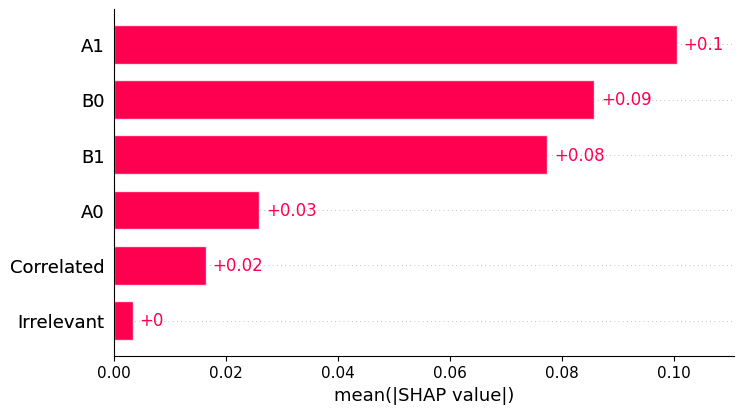

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [19]:
xai.get_bar_plot()

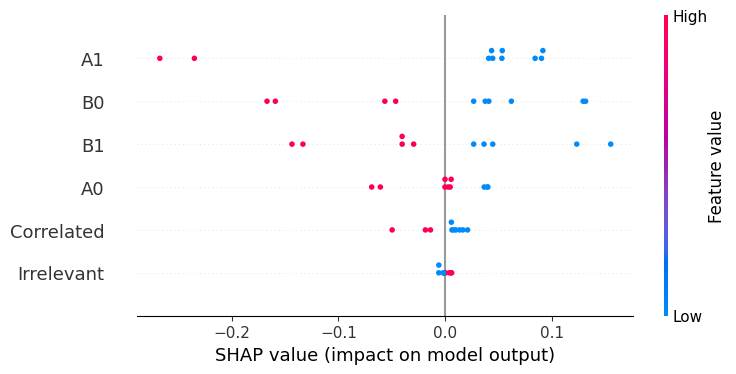

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [24]:
xai.get_beeswarm_plot()

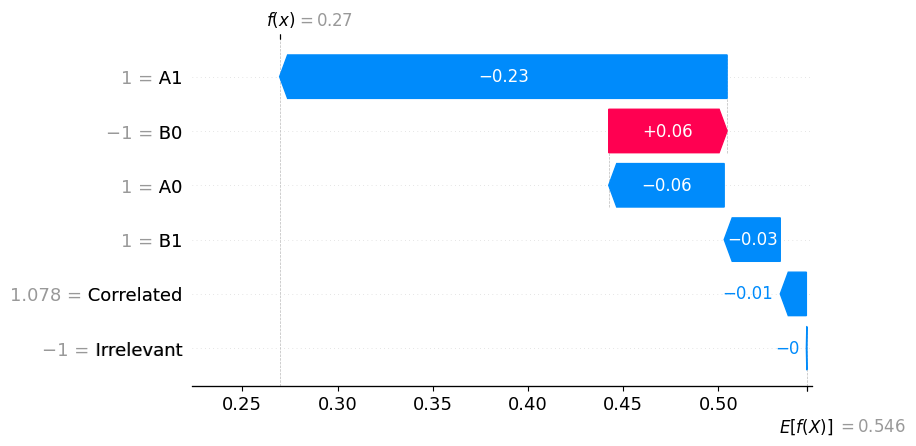

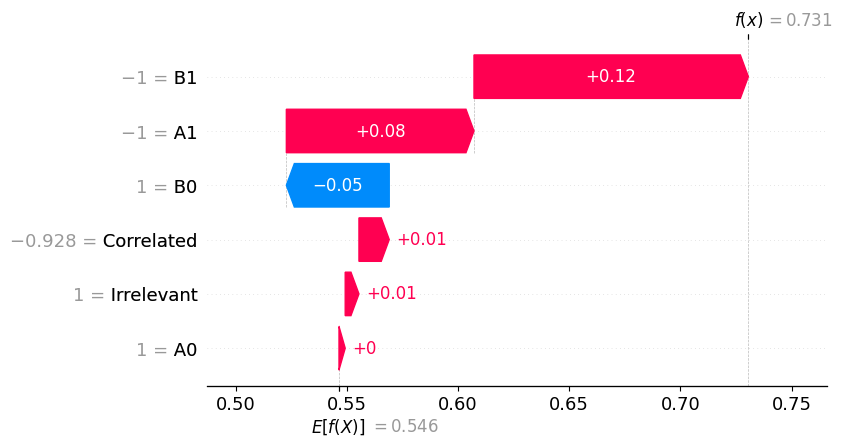

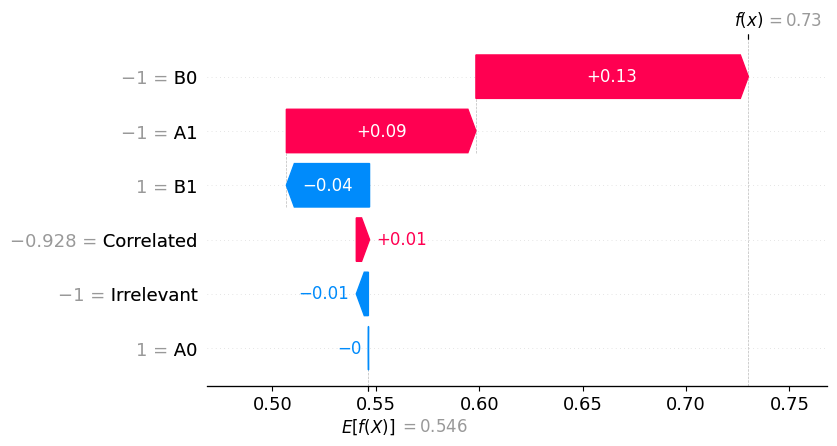

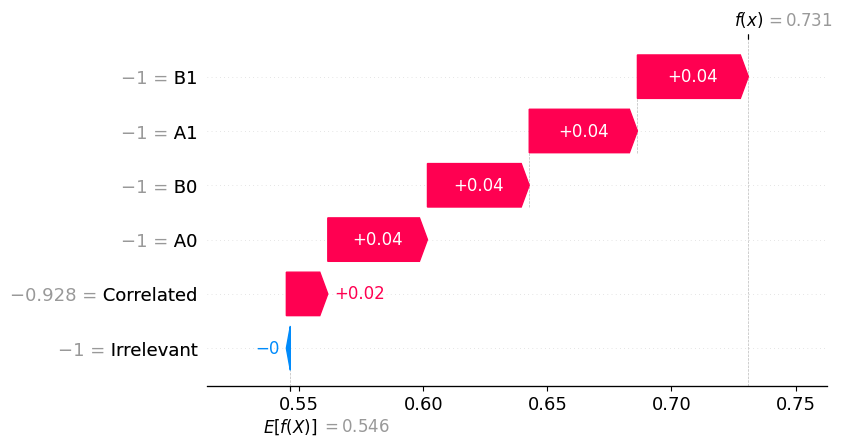

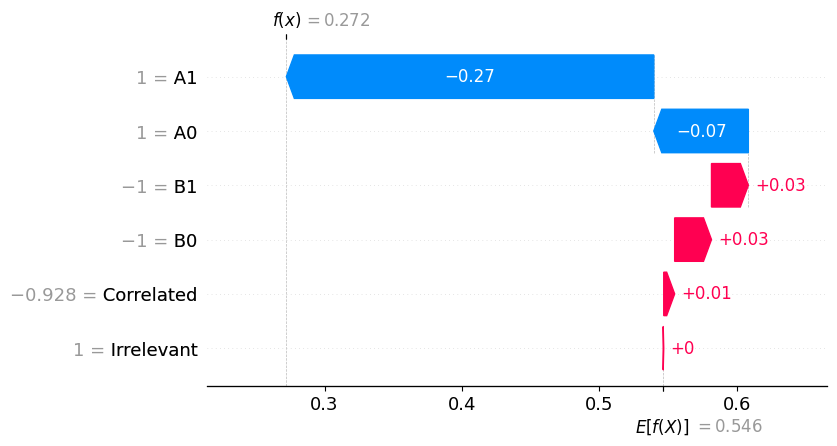

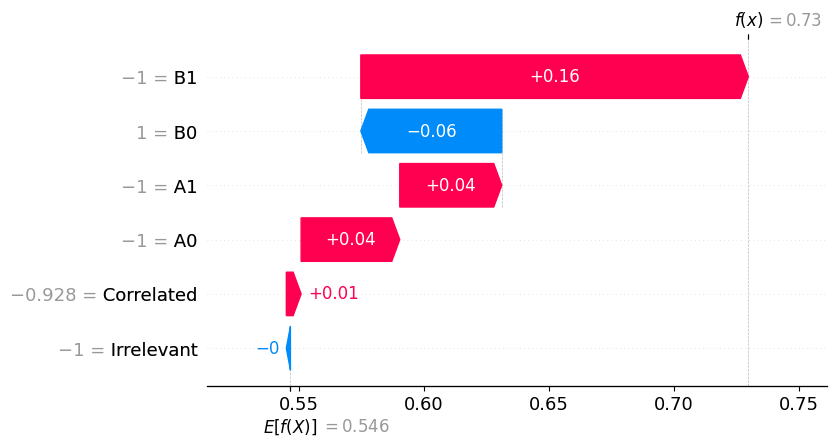

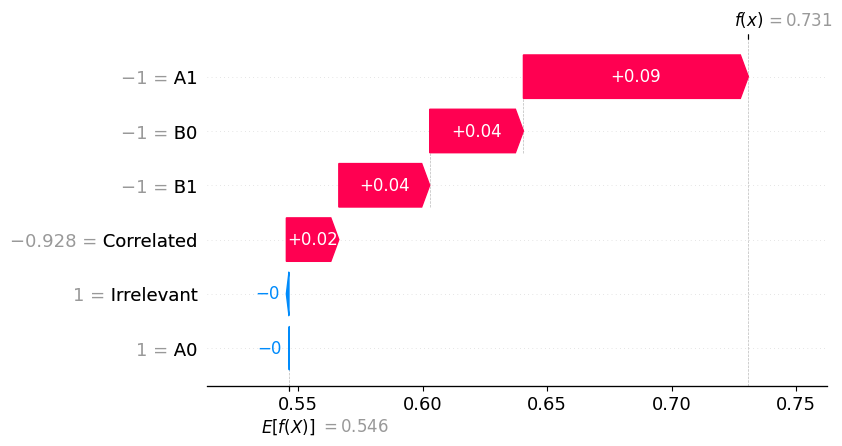

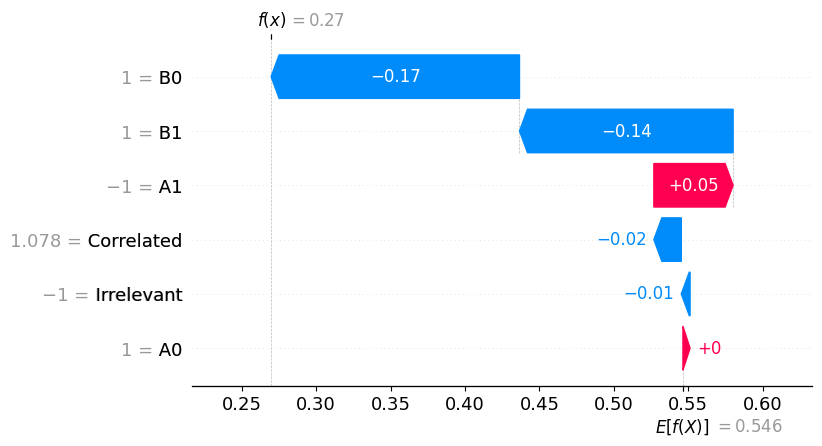

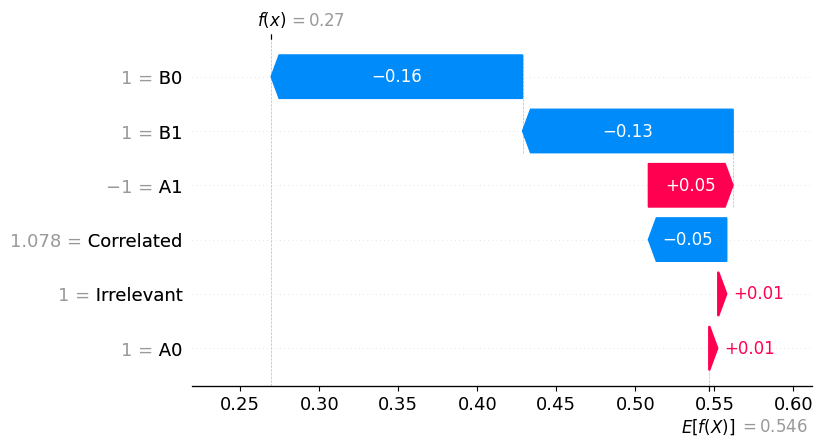

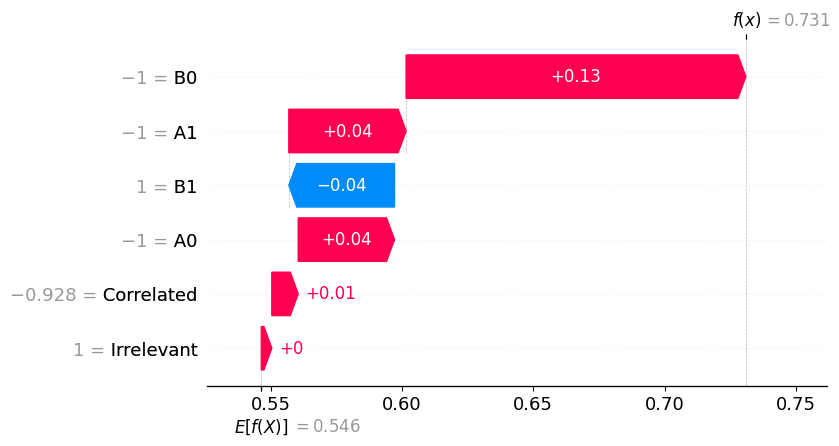

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [26]:
xai.get_plot("waterfall", index=0)
xai.get_plot("waterfall", index=1)
xai.get_plot("waterfall", index=2)
xai.get_plot("waterfall", index=3)
xai.get_plot("waterfall", index=4)
xai.get_plot("waterfall", index=5)
xai.get_plot("waterfall", index=6)
xai.get_plot("waterfall", index=7)
xai.get_plot("waterfall", index=8)
xai.get_plot("waterfall", index=9)

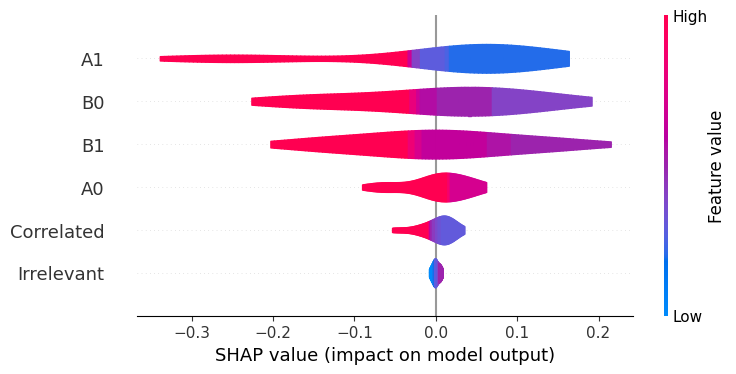

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [29]:
xai.get_plot("violin", class_index=1)

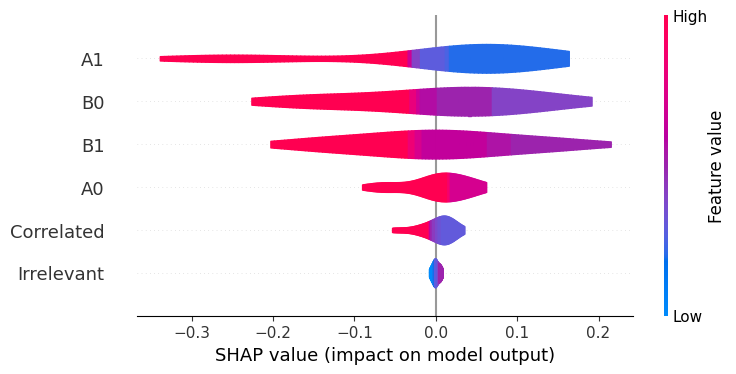

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [30]:
xai.get_plot("violin", class_index=-1)

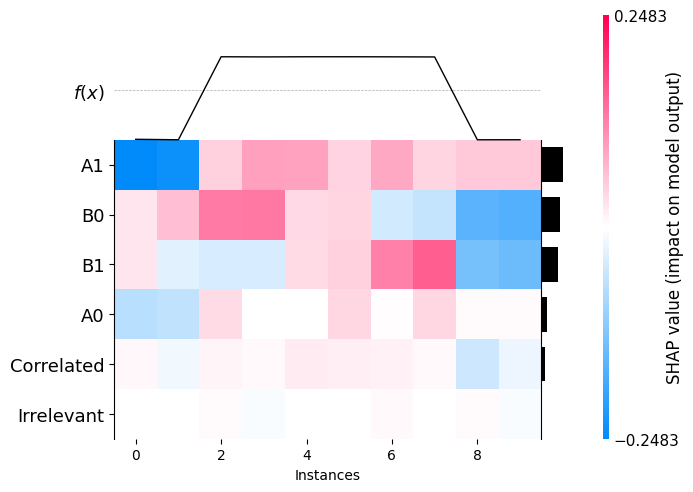

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [31]:
xai.get_plot("heatmap", class_index=1)

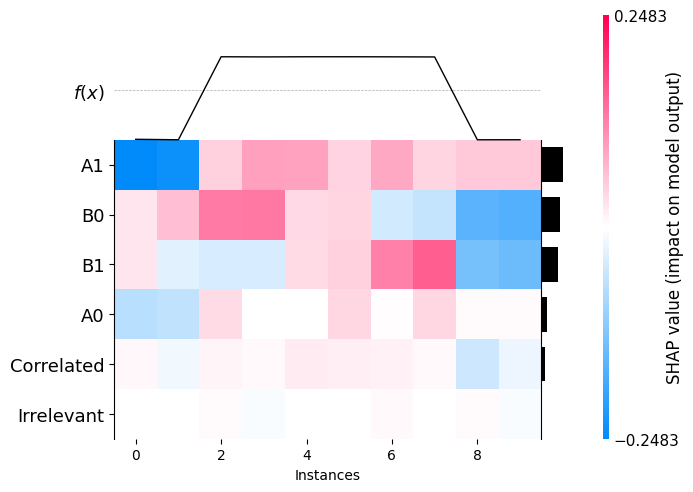

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [32]:
xai.get_plot("heatmap", class_index=-1)